Memulai proses kompresi...
Proses kompresi selesai.
------------------------------
--- Analisis Ukuran File ---
Ukuran File Asli (WAV): 31509.10 KB
Ukuran File Kompresi (MP3): 2626.54 KB
Rasio Kompresi: Sekitar 12.0:1
------------------------------
Membuat visualisasi perbandingan...


/tmp/ipykernel_26321/3473724168.py:121: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
/tmp/ipykernel_26321/3473724168.py:122: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig('hasil_analisis_kompresi.png')


Visualisasi telah disimpan sebagai 'hasil_analisis_kompresi.png'


/home/kasflaf/.local/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


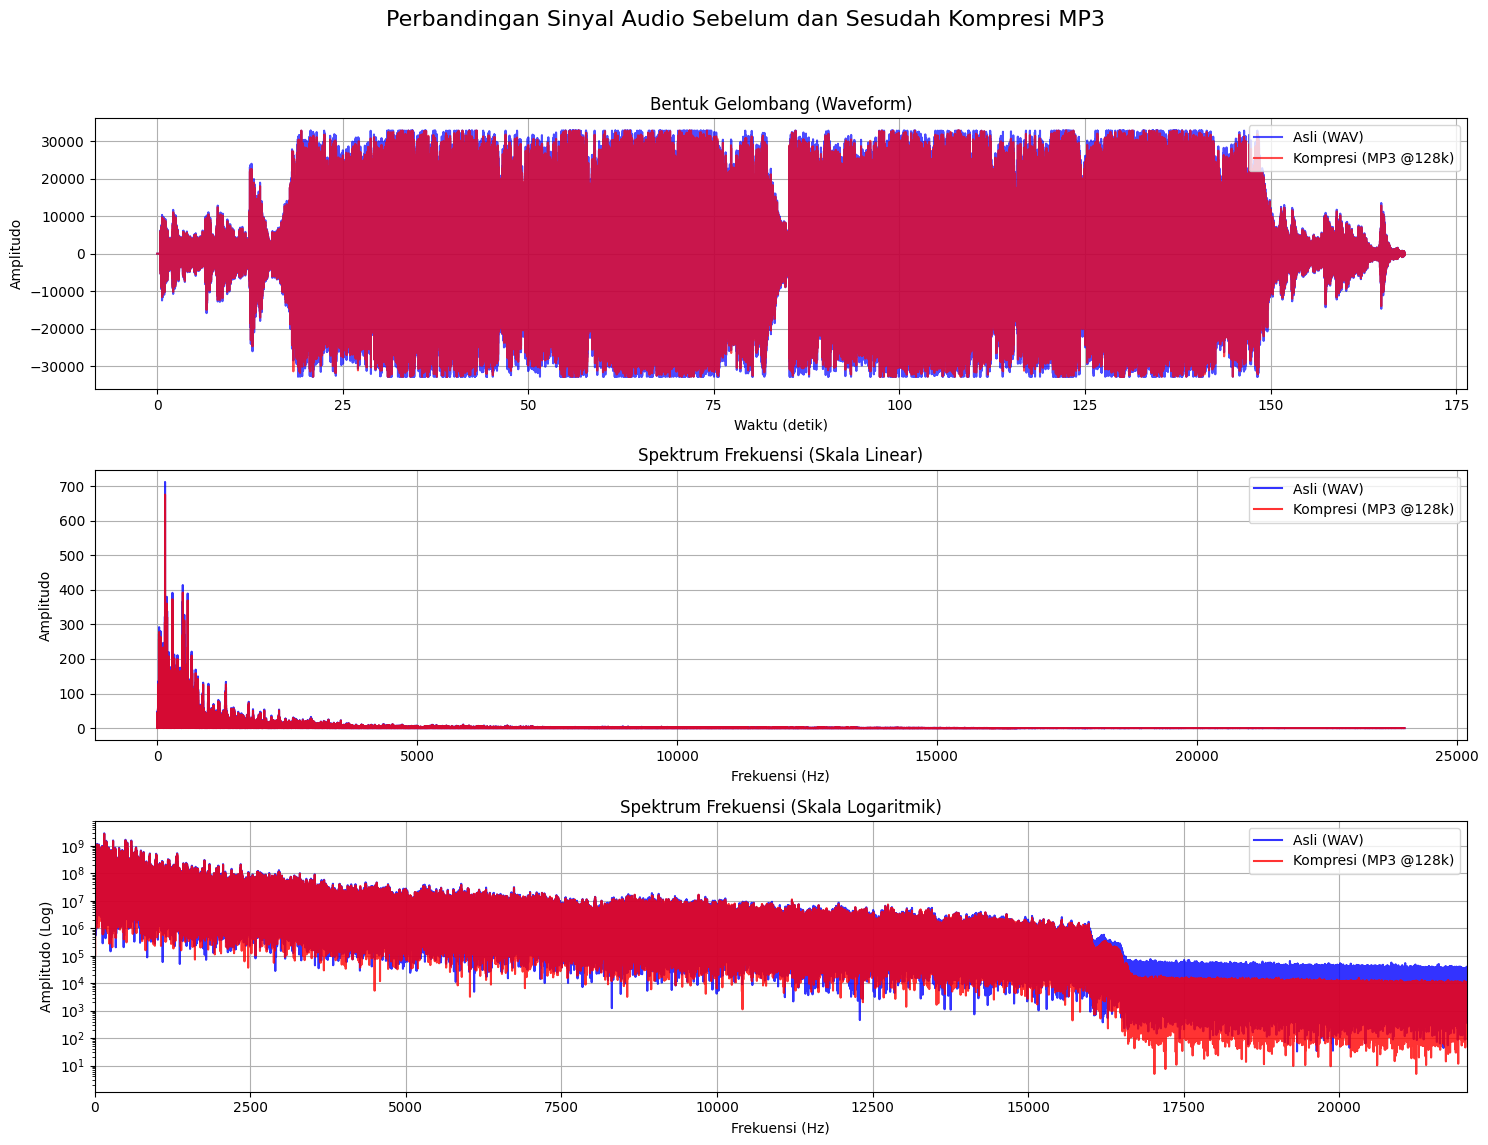

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from pydub import AudioSegment
from scipy.io import wavfile
from scipy.fft import fft, fftfreq

# --- Konfigurasi ---
file_wav_asli = '33.wav'
file_mp3_hasil = 'audio_kompresi.mp3'
bitrate_kompresi = '128k' # Bitrate umum, bisa diubah (misal: '64k', '192k', '320k')

# --- Langkah 1 & 2: Memuat & Melakukan Kompresi Audio ---

print("Memulai proses kompresi...")

# Memuat file WAV menggunakan pydub
try:
    audio_asli = AudioSegment.from_wav(file_wav_asli)
except FileNotFoundError:
    print(f"Error: File '{file_wav_asli}' tidak ditemukan. Pastikan file ada di direktori yang sama.")
    exit()

# Mengekspor (mengompres) ke format MP3
audio_asli.export(file_mp3_hasil, format="mp3", bitrate=bitrate_kompresi)

# Memuat kembali file MP3 yang sudah dikompresi untuk analisis
audio_kompresi = AudioSegment.from_mp3(file_mp3_hasil)

print("Proses kompresi selesai.")
print("-" * 30)


# --- Langkah 3: Perbandingan Karakteristik ---

# 1. Perbandingan Ukuran File
ukuran_file_asli = os.path.getsize(file_wav_asli) / 1024  # dalam KB
ukuran_file_kompresi = os.path.getsize(file_mp3_hasil) / 1024 # dalam KB

print("--- Analisis Ukuran File ---")
print(f"Ukuran File Asli (WAV): {ukuran_file_asli:.2f} KB")
print(f"Ukuran File Kompresi (MP3): {ukuran_file_kompresi:.2f} KB")
rasio_kompresi = ukuran_file_asli / ukuran_file_kompresi
print(f"Rasio Kompresi: Sekitar {rasio_kompresi:.1f}:1")
print("-" * 30)


# 2. Analisis untuk Visualisasi Gelombang (Waveform) dan Spektrum Frekuensi

# Mendapatkan data sampel dari audio asli (WAV)
samplerate_asli, data_asli = wavfile.read(file_wav_asli)
# Jika stereo, ambil channel kiri saja untuk simplifikasi
if data_asli.ndim > 1:
    data_asli = data_asli[:, 0]

# Mendapatkan data sampel dari audio kompresi (MP3)
data_kompresi = np.array(audio_kompresi.get_array_of_samples())
# Jika stereo, ambil channel kiri
if audio_kompresi.channels == 2:
    data_kompresi = data_kompresi[::2]
samplerate_kompresi = audio_kompresi.frame_rate

# Membuat sumbu waktu untuk plot
durasi_asli = len(data_asli) / samplerate_asli
waktu_asli = np.linspace(0., durasi_asli, len(data_asli))

durasi_kompresi = len(data_kompresi) / samplerate_kompresi
waktu_kompresi = np.linspace(0., durasi_kompresi, len(data_kompresi))


# 3. Menghitung Spektrum Frekuensi (menggunakan FFT)

# FFT untuk audio asli
N_asli = len(data_asli)
yf_asli = fft(data_asli)
xf_asli = fftfreq(N_asli, 1 / samplerate_asli)

# FFT untuk audio kompresi
N_kompresi = len(data_kompresi)
yf_kompresi = fft(data_kompresi)
xf_kompresi = fftfreq(N_kompresi, 1 / samplerate_kompresi)


# --- Visualisasi Hasil ---
print("Membuat visualisasi perbandingan...")

fig, axs = plt.subplots(3, 1, figsize=(15, 12))
fig.suptitle('Perbandingan Sinyal Audio Sebelum dan Sesudah Kompresi MP3', fontsize=16)

# Plot 1: Visualisasi Gelombang (Waveform)
axs[0].set_title('Bentuk Gelombang (Waveform)')
axs[0].plot(waktu_asli, data_asli, label='Asli (WAV)', color='blue', alpha=0.7)
axs[0].plot(waktu_kompresi, data_kompresi, label=f'Kompresi (MP3 @{bitrate_kompresi})', color='red', alpha=0.7)
axs[0].set_xlabel('Waktu (detik)')
axs[0].set_ylabel('Amplitudo')
axs[0].legend()
axs[0].grid(True)

# Plot 2: Spektrum Frekuensi (Linear)
axs[1].set_title('Spektrum Frekuensi (Skala Linear)')
# Mengambil hanya frekuensi positif dan menormalkan amplitudo
axs[1].plot(xf_asli[:N_asli//2], 2.0/N_asli * np.abs(yf_asli[0:N_asli//2]), label='Asli (WAV)', color='blue', alpha=0.8)
axs[1].plot(xf_kompresi[:N_kompresi//2], 2.0/N_kompresi * np.abs(yf_kompresi[0:N_kompresi//2]), label=f'Kompresi (MP3 @{bitrate_kompresi})', color='red', alpha=0.8)
axs[1].set_xlabel('Frekuensi (Hz)')
axs[1].set_ylabel('Amplitudo')
axs[1].legend()
axs[1].grid(True)

# Plot 3: Spektrum Frekuensi (Logaritmik) - lebih jelas untuk melihat cutoff
axs[2].set_title('Spektrum Frekuensi (Skala Logaritmik)')
axs[2].semilogy(xf_asli[:N_asli//2], np.abs(yf_asli[0:N_asli//2]), label='Asli (WAV)', color='blue', alpha=0.8)
axs[2].semilogy(xf_kompresi[:N_kompresi//2], np.abs(yf_kompresi[0:N_kompresi//2]), label=f'Kompresi (MP3 @{bitrate_kompresi})', color='red', alpha=0.8)
axs[2].set_xlabel('Frekuensi (Hz)')
axs[2].set_ylabel('Amplitudo (Log)')
# Batasi sumbu x untuk melihat detail cutoff frekuensi tinggi
axs[2].set_xlim(0, 22050) # Setengah dari sample rate umum (44100 Hz)
axs[2].legend()
axs[2].grid(True)


plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('hasil_analisis_kompresi.png')
print("Visualisasi telah disimpan sebagai 'hasil_analisis_kompresi.png'")
plt.show()